<a href="https://colab.research.google.com/github/aditya00kumar/data-science-with-python/blob/master/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch

In [0]:
import torch
import numpy as np

In [2]:
v = torch.torch.tensor([1,2,3])
print(v)

tensor([1, 2, 3])


In [3]:
f = torch.FloatTensor([1,2,3])
print(f)

tensor([1., 2., 3.])


In [4]:
print(v.dtype, f.dtype)

torch.int64 torch.float32


In [5]:
f.size()

torch.Size([3])

In [6]:
v.view(3,-1)

tensor([[1],
        [2],
        [3]])

In [7]:
v.view(3,1)

tensor([[1],
        [2],
        [3]])

In [0]:
arr = np.array([0,1,2,3,4])

In [9]:
xx = torch.from_numpy(arr)
xx.numpy()

array([0, 1, 2, 3, 4])

**Vector Operations**

In [0]:
a = torch.tensor([1,2,3])
b = torch.tensor([2,3,4])

In [11]:
a+b

tensor([3, 5, 7])

In [12]:
torch.dot(a,b)

tensor(20)

In [0]:
x = torch.linspace(0, 10, 100)
y = torch.sin(x)

In [0]:
import matplotlib.pyplot as plt

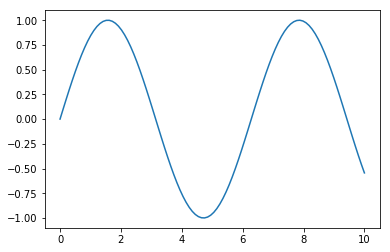

In [15]:
plt.plot(x.numpy(), y.numpy())

In [16]:
one_d = torch.arange(0,9)
one_d

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
two_d = one_d.view(3, -1)
two_d

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [18]:
torch.arange(32).view(4,2,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31]]])

In [19]:
a = torch.tensor([1,2,3,4,5,6]).view(2,3)
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [20]:
b = torch.tensor([1,2,3,4,5,6]).view(3,2)
b

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [21]:
torch.matmul(a,b)

tensor([[22, 28],
        [49, 64]])

In [22]:
a@b

tensor([[22, 28],
        [49, 64]])

**Gradient**

In [0]:
x = torch.tensor(2., requires_grad=True)
y = 9*x**4 + 2*x**3 + 3*x**2 +6*x +1

In [0]:
y.backward()

In [28]:
print(x.grad)

None


**Partial Derivative**

In [0]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(1., requires_grad=True)

In [0]:
z = x**2 + y**3

In [0]:
z.backward()

In [32]:
x.grad, y.grad

(tensor(4.), tensor(3.))

# **Linear Class**

In [0]:
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt

In [34]:
torch.manual_seed(1)

In [35]:
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [36]:
x = torch.tensor([[1.0],[ 2.]])
model(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

# Create dataset

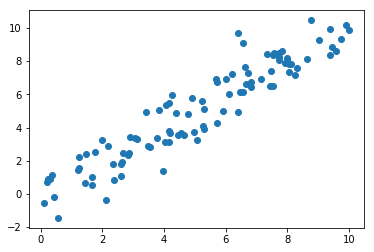

In [37]:
X = torch.rand(100, 1)*10
y = X + torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    return self.linear(x)

In [0]:
model = LR(1,1)

In [40]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.3707]], requires_grad=True), Parameter containing:
 tensor([0.8817], requires_grad=True)]

In [41]:
x = torch.tensor([[2.], [3.]])
model.forward(x)

tensor([[ 0.1403],
        [-0.2304]], grad_fn=<AddmmBackward>)

In [0]:
criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [47]:
epoch = 100
losses = []
for i in range(epoch):
  y_pred = model.forward(X)
  loss = criteria(y_pred, y)
  print("epoch:",i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 46.73091506958008
epoch: 1 loss: 6.019163131713867
epoch: 2 loss: 1.8173578977584839
epoch: 3 loss: 1.381518840789795
epoch: 4 loss: 1.334154486656189
epoch: 5 loss: 1.3268814086914062
epoch: 6 loss: 1.3237639665603638
epoch: 7 loss: 1.321095585823059
epoch: 8 loss: 1.3184934854507446
epoch: 9 loss: 1.31591796875
epoch: 10 loss: 1.3133649826049805
epoch: 11 loss: 1.3108340501785278
epoch: 12 loss: 1.3083244562149048
epoch: 13 loss: 1.30583655834198
epoch: 14 loss: 1.3033698797225952
epoch: 15 loss: 1.3009241819381714
epoch: 16 loss: 1.2984994649887085
epoch: 17 loss: 1.296095371246338
epoch: 18 loss: 1.2937119007110596
epoch: 19 loss: 1.2913488149642944
epoch: 20 loss: 1.2890058755874634
epoch: 21 loss: 1.2866830825805664
epoch: 22 loss: 1.2843799591064453
epoch: 23 loss: 1.2820966243743896
epoch: 24 loss: 1.2798327207565308
epoch: 25 loss: 1.277588129043579
epoch: 26 loss: 1.2753628492355347
epoch: 27 loss: 1.2731565237045288
epoch: 28 loss: 1.270969033241272
epoch: 29 

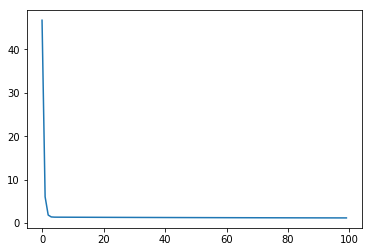

In [48]:
plt.plot(range(epoch), losses)